<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP2/ML2025_MiniP2_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Question 3
Arash Razi

A clothing manufacturing company is seeking to understand which features or sections contribute to increased sales. For this purpose, various algorithms are used to analyze the data. The data provided to you includes 10 features and 400 records.

The goal is to use decision trees and other algorithms to identify the features that have the greatest impact on increasing sales.


###Import neccessery libraries


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

###3.1

The section of the dataset used in this project is in the form of Comma Separated Values (CSV) format, and you must first read it as a DataFrame. (Hint: you can use the pandas.read_csv() function to do this.) You can download the dataset using this [link](https://github.com/sobhanskh/Ai_2025)

- Using the head() function, read and display the first ten rows of the dataset.

In [ ]:
url = "https://raw.githubusercontent.com/sobhanskh/Ai_2025/main/Company_Data.csv"
df = pd.read_csv(url)

df.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes
8,6.54,132,110,0,108,124,Medium,76,10,No,No
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes


###3.2 Dataset Preprocessing

Preprocessing the dataset is one of the initial and very important stages in data science, machine learning, and artificial intelligence. This stage involves a set of techniques and operations performed on raw data to prepare it for analysis or model training. Raw data is often incomplete, inconsistent, noisy, or has varying scales. Without preprocessing, machine learning models cannot be properly trained and may produce incorrect or unreliable results.
For this purpose, we will follow the steps outlined below:

- First, determine whether there are any incomplete or missing data within the dataset. If incomplete or missing data exist, remove them from the dataset.

In [ ]:
print("Number of missing values in different features:")
## Showing Number of Missing data in each row
display(df.isnull().sum())

## removing rows contaning missing data
cleaned_df = df.dropna()
display(cleaned_df)


Number of missing values in different features:


,0
Sales,0
CompPrice,0
Income,0
Advertising,0
Population,0
Price,0
ShelveLoc,0
Age,0
Education,0
Urban,0


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


- One common problem within datasets is the presence of duplicate data.
  First, explain how duplicate data can cause problems for trained models and data analysis.
  Then, determine how many duplicate records exist in the dataset, and if any are found, remove them.



In [ ]:
duplicate_rows = df.duplicated()
df_cleaned = df.drop_duplicates()

print("Number of Duplicated Rows:")
print(duplicate_rows.sum())

Number of Duplicated Rows:
0


 - Features such as the location where the product is sold (whether it is sold in a city or non-city area in the U.S. or outside the U.S.) and the shelf placement of the product are categorical features. In order to use such features in model training, they must be converted into numerical features. Therefore, these features should be encoded.


In [ ]:
df_encoded = df.copy()

categorical_cols = (df_encoded.select_dtypes(include = ['object','category']).columns)

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

display(df_encoded.head(5))


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


- As mentioned, the purpose of the dataset is to see how these features can lead to increased sales. Therefore, the target variable in such a dataset is the amount of product sales (sales). However, as can be seen, the output values are numerical variables, and our goal is also to train the model using a decision tree. For this purpose, it is necessary to convert the numerical variables into categorical variables. Implement this process for the target variable. Set the number of classes based on your own estimation of the target variable.

In [ ]:
n = 3
sale_classes = ['L','N','H']

df_sale_classed = df_encoded.copy()

df_sale_classed['Sale Class'] = pd.qcut(df_sale_classed['Sales'],q=n,labels = sale_classes)
df = df_sale_classed.drop(['Sales'],axis = 1)
display(df_sale_classed['Sale Class'].value_counts())


,count
Sale Class,
N,135
L,133
H,132


In this way, the preprocessing stage on the dataset comes to an end.

- Plot the correlation matrix between the dataset features and the target variable.


In [ ]:

numeric_df = df_sale_classed.select_dtypes(include='number')

correlation_matrix = numeric_df.corr()

sales_correlation = correlation_matrix['Sales'].sort_values(ascending=False)

display(sales_correlation)


,Sales
Sales,1.000000
Advertising,0.269507
US,0.177093
ShelveLoc,0.157470
Income,0.151951
CompPrice,0.064079
Population,0.050471
Urban,-0.015419
Education,-0.051955
Age,-0.231815



- After plotting the matrix, analyze which features have higher correlations with each other and with the target variable.

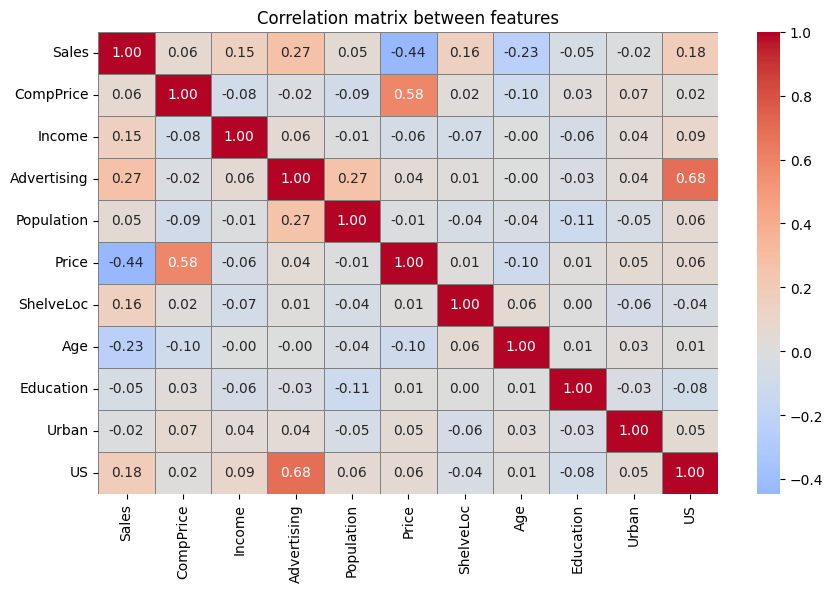

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",
            cmap="coolwarm", center=0, linewidths=0.5, linecolor='gray')
plt.title('Correlation matrix between features')
plt.show()

###3.3 Entropy Calculation of Data

In machine learning, when we use decision trees for data classification, we need to decide at each node which feature best splits the data. To do this, we use metrics that measure impurity or disorder. **Entropy** is a concept from information theory that measures the amount of disorder or uncertainty in a dataset. Its formula is as follows:

$$
\text{Entropy}(S) = - \sum_{i=1}^{n} P_i \log_2(P_i)
$$

Where:
- \( S \) is the dataset,
- \( P_i \) is the proportion of data points belonging to class \( i \),
- \( n \) is the number of classes.


If all the samples belong to a single class, the entropy will be zero (i.e., there is no disorder). If the samples are evenly distributed among the classes, the entropy will reach its maximum value.

Implement the function `calculate_entropy(y)` correctly.  
Hint: `y` is an array of type `ndarray`.



In [ ]:
def calculate_entropy(target):
    p = target.value_counts()/len(target)
    p = p[p>0]
    entropy = -np.sum(np.multiply(p,np.log2(p)))
    return entropy
#Test
target = df['Sale Class']
print(calculate_entropy(target=target))


1.584899456577634


###3.4 Information Gain Calculation

In building a decision tree, choosing the best feature to split the data plays a very important role in the accuracy and performance of the model. One of the most common criteria for selecting a suitable feature is **Information Gain**. Information gain indicates how much the disorder (Entropy) of the dataset is reduced by splitting the data based on a particular feature. Simply put, this criterion tells us how useful a feature is for correctly predicting the class of the data.

The formula is as follows:

$$
IG(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \text{weight} \times \text{Entropy}(S_v)
$$

Where:

* $S$: The original dataset.

* $\text{Values}(A)$: The possible values for feature $A$.

* $S_v$: The subset of $S$ where feature $A = v$.

* $
\text{Weight} = \frac{\text{Number of samples in subset } S_v \text{ (child)}}{\text{Total number of samples in the parent node dataset}} \quad \text{(subset weight)}.
$


Implement the info_gain(parent, children) function correctly.
(Hint: parent is a list of the labels of the original dataset, and children is a list of subsets resulting from the split, where each subset contains its own class labels.)


In [ ]:
feature = 'US'
def information_gain(data,feature,target):
  entropy_parent = calculate_entropy(data[target])
  entropy_child = 0
  for unique_value in data[feature].unique():
    subset = data[data[feature] == unique_value]
    w = len(subset)/len(data)
    entropy_child += w*calculate_entropy(subset[target])
  IG = entropy_parent - entropy_child

  return IG

#Test
information_gain(data=df,feature='US',target='Sale Class')




np.float64(0.021650290973458386)

### 3.5 Decision Tree

As previously explained, a decision tree is a supervised learning model that has a structure similar to a tree and is used to predict the value of a target variable. This structure consists of nodes and branches, where data is split at each node based on a specific feature and value. These splits are made in such a way that the data is directed toward leaf nodes with higher purity. The tree growth process continues until a stopping criterion is met, such as reaching a specific depth or having a small number of samples in each node.










- What is the concept of pruning in decision trees? Mention the advantages and disadvantages of using this method.

**Answered in Reoprt**

- Using the GridSearchCV function, train a decision tree model and obtain the optimal values for the parameters. Also, briefly explain how this function works.

In [ ]:
X = df.drop(columns=['Sale Class'])
y = df['Sale Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


dt = DecisionTreeClassifier(class_weight='balanced')


param_grid = {
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}


grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)


print(f"Best Parameters: {grid_search.best_params_}")


best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best Parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Test Accuracy: 0.675


 - Plot your final decision tree (for this, you can use the plot_tree function).

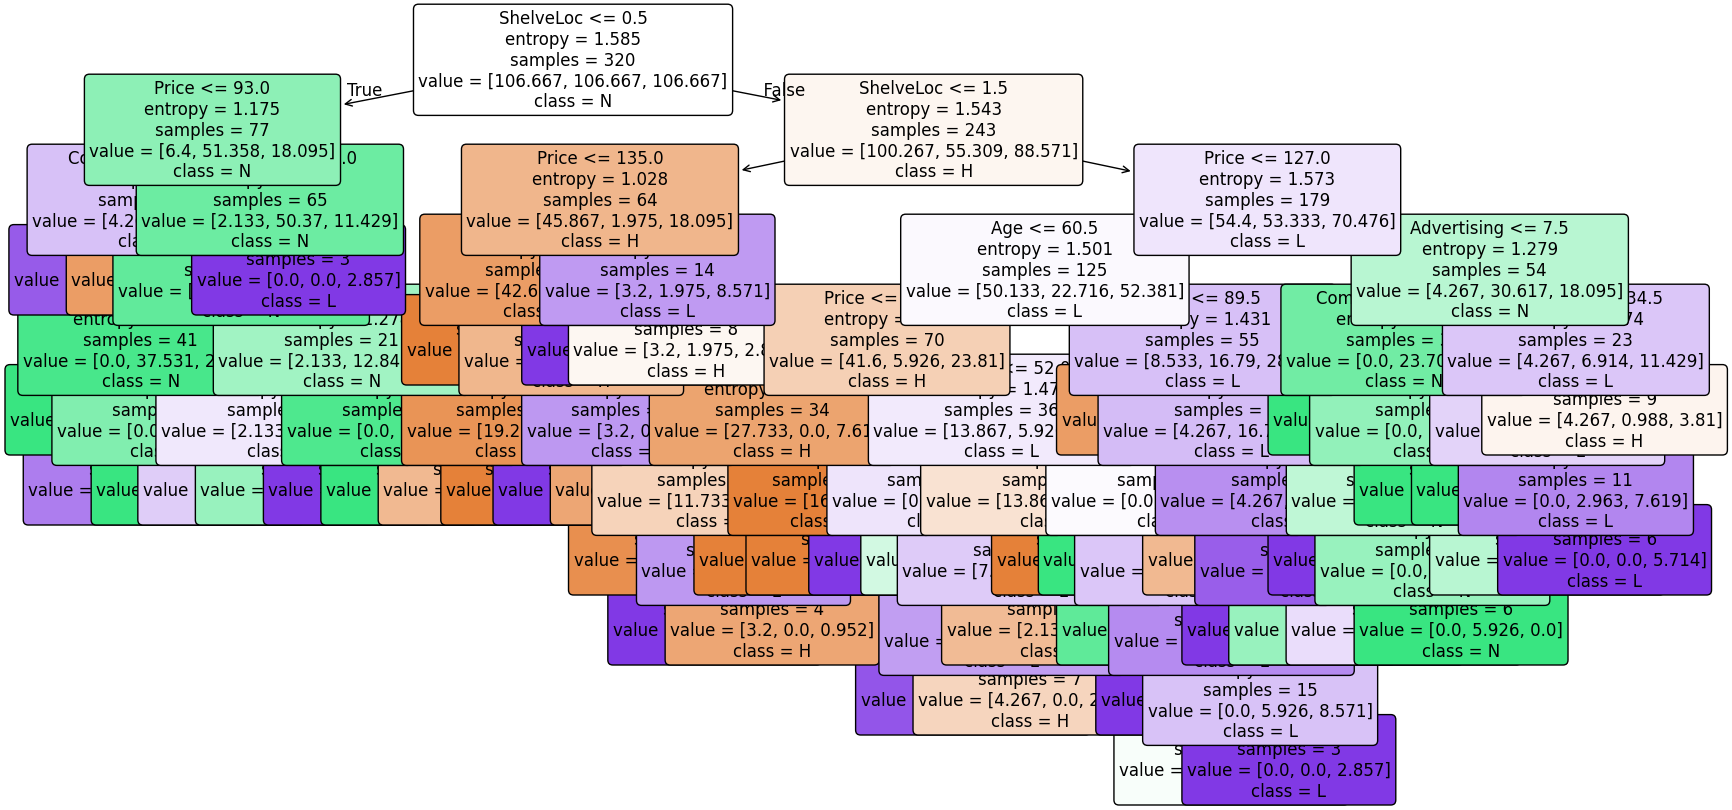

In [ ]:
best_tree = grid_search.best_estimator_

plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=y.unique(),
          filled=True,
          rounded=True,
          fontsize=12)
plt.show()


- Has underfitting or overfitting occurred in your model? Generally, when does this phenomenon occur? Explain each one. Additionally, what strategies exist for controlling it in decision tree models?

- For the model, report and analyze the evaluation criteria outputs using test data.


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)



Classification Report:
              precision    recall  f1-score   support

           H       0.68      0.81      0.74        32
           L       0.76      0.76      0.76        25
           N       0.53      0.39      0.45        23

    accuracy                           0.68        80
   macro avg       0.66      0.65      0.65        80
weighted avg       0.66      0.68      0.66        80



- Plot and analyze the confusion matrix for the implemented model with test data.

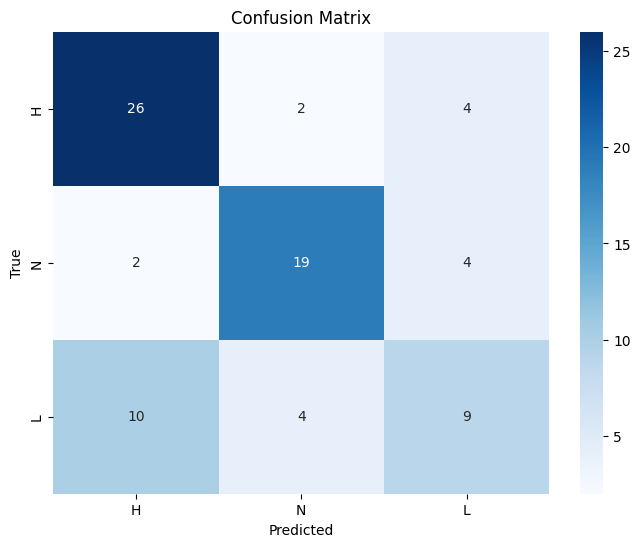

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()